# Exercise 6: Clusters and Anomalies

---

## House Prices - Advanced Regression Techniques

Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [517]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [518]:
houseData = pd.read_csv('train.csv')

Extract the two variables in consideration from the dataset

In [519]:
X = pd.DataFrame(houseData[['GrLivArea','GarageArea']])

Visualize the 2D distribution of the two variables extracted above, using a standard scatter plot.

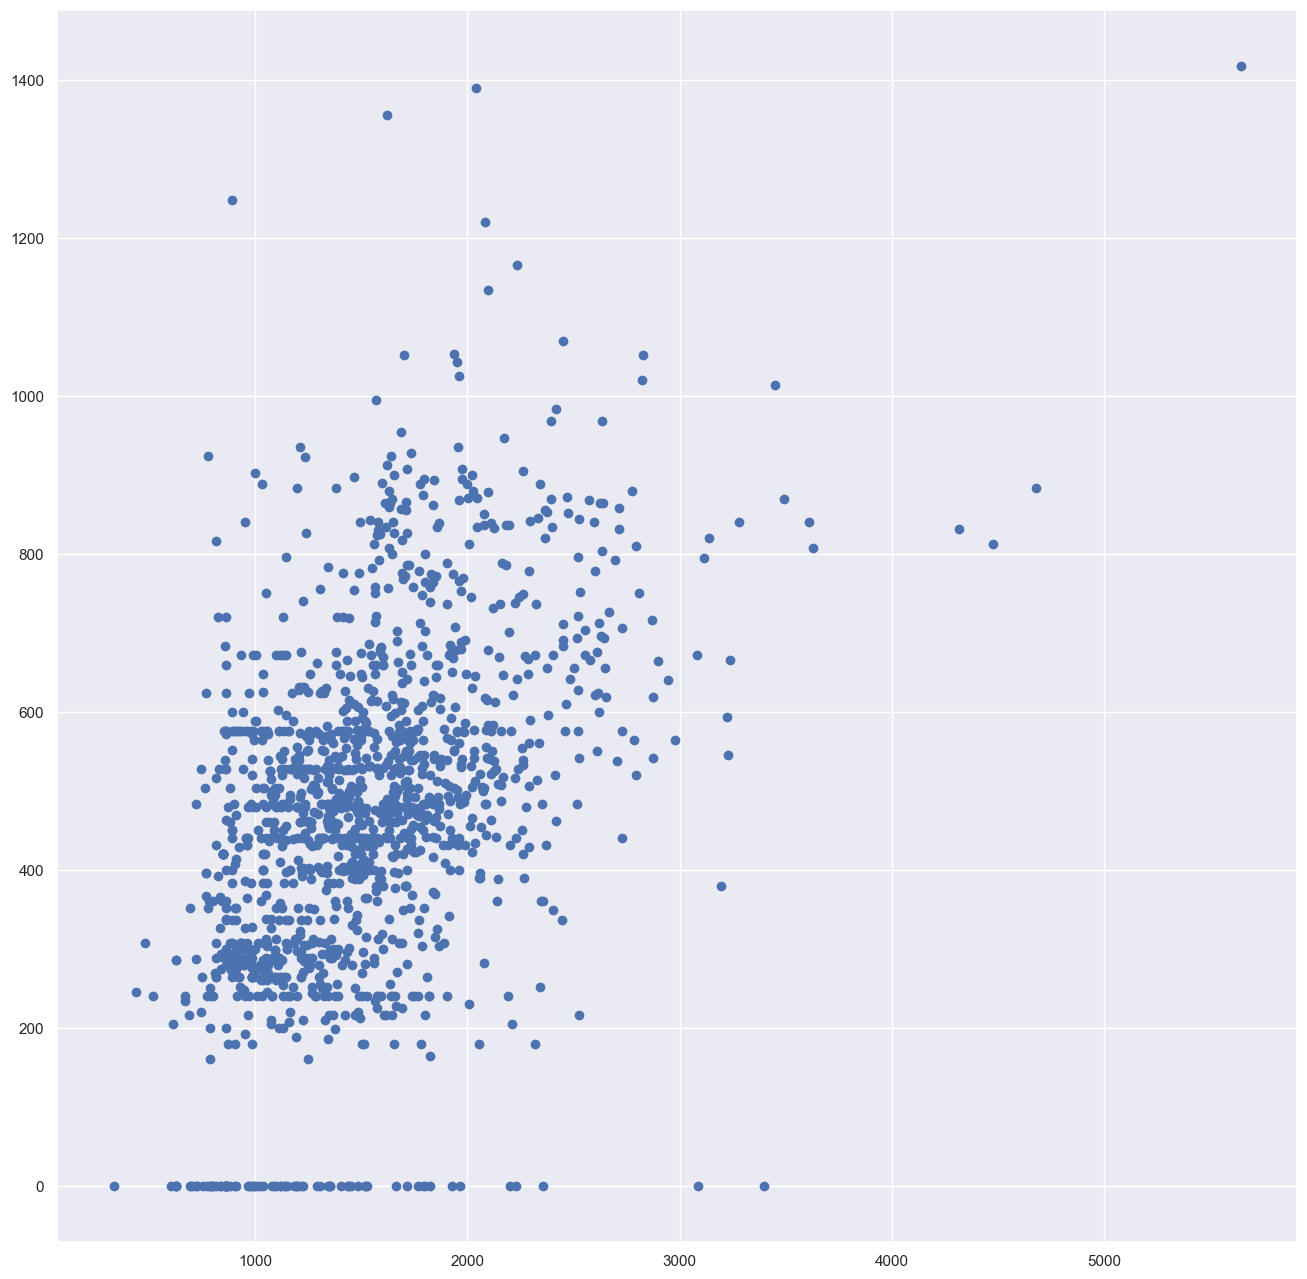

In [520]:
f, axes = plt.subplots(1, 1, figsize=(16,16))
plt.scatter(x = "GrLivArea", y = "GarageArea", data = X)

Import k-Means Clustering model from Scikit-Learn

In [521]:
from sklearn.cluster import KMeans

Guess the number of clusters from the 2D scatterplot.

In [522]:
num_clust = 3

Perform k-Means clustering with that.

In [523]:
kmeans = KMeans(n_clusters = num_clust, n_init=10)

kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

Print the cluster centers

In [524]:
print("Features", "\tGrLivArea", "\tGarageArea")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t\t")
    print()

Features 	GrLivArea 	GarageArea

Cluster 0:	1697.43		522.1		
Cluster 1:	2575.22		682.65		
Cluster 2:	1085.85		374.89		


View their countplot.

<Axes: xlabel='Cluster', ylabel='count'>

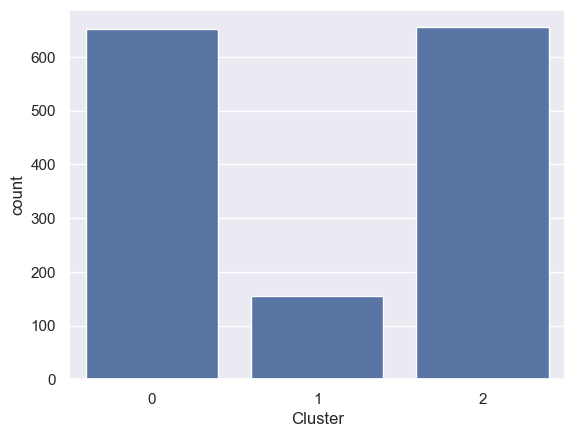

In [525]:
labels = kmeans.predict(X)

X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

sb.countplot(x=X_labeled["Cluster"])

Visualize the clusters on the 2D scatterplot.

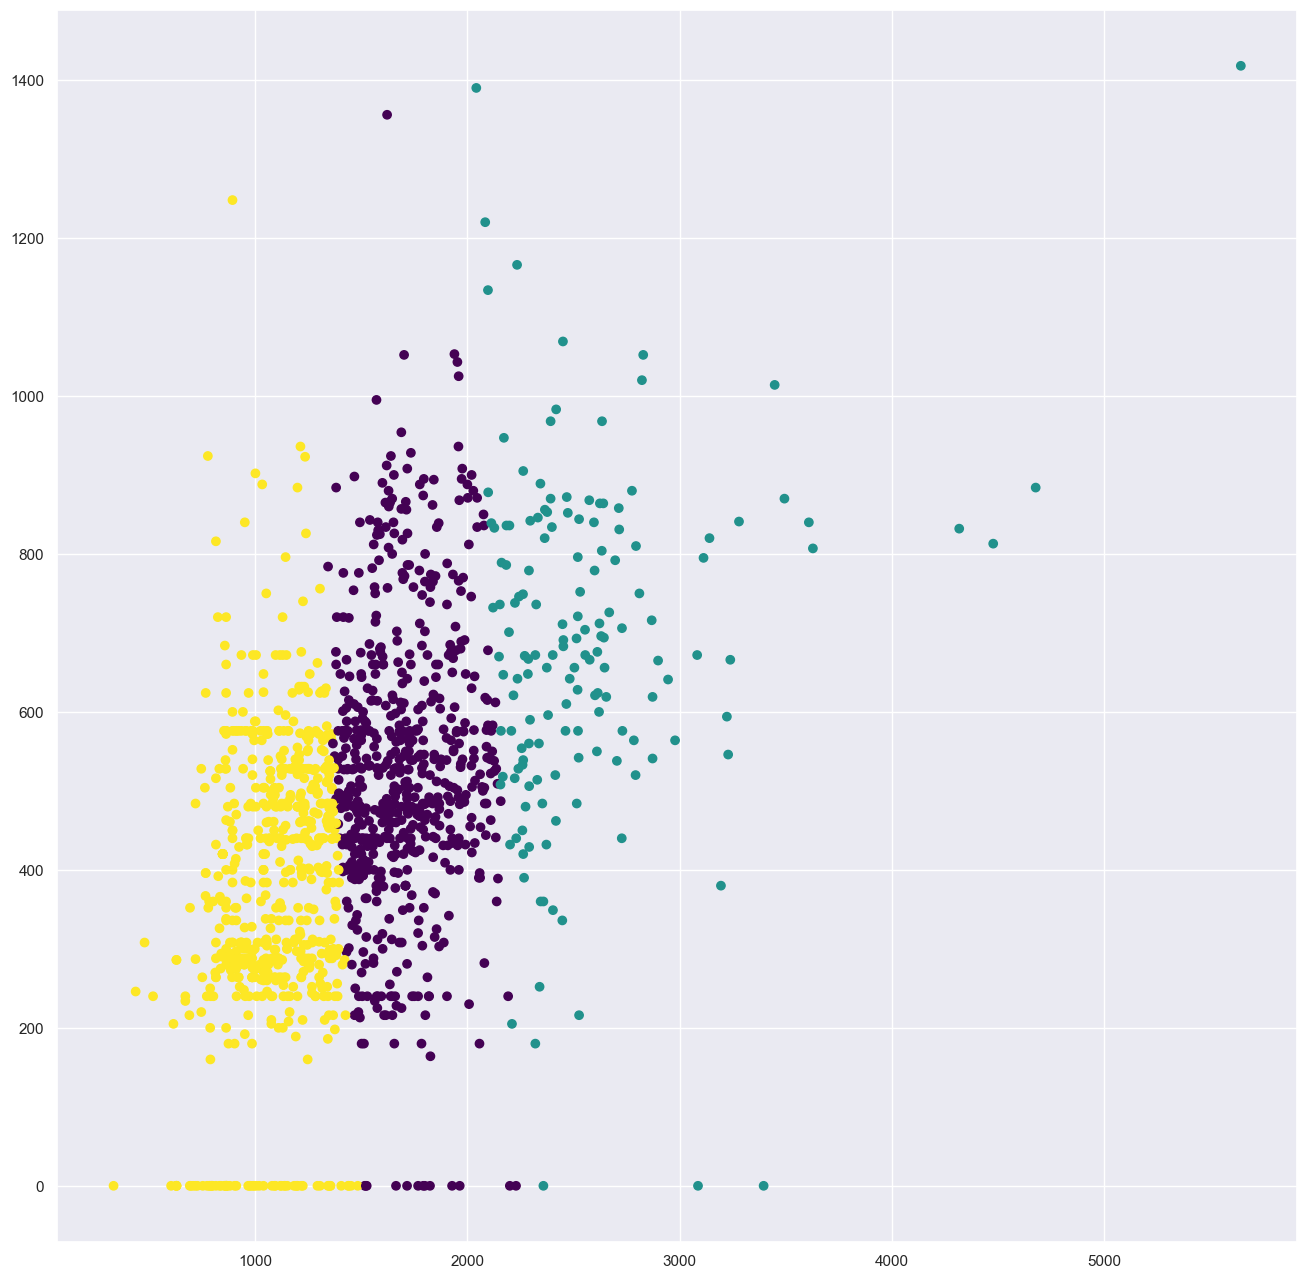

In [526]:
f, axes = plt.subplots(1, 1, figsize=(16,16))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Cluster", cmap = 'viridis', data = X_labeled)

Import Anomaly model from Scikit-Learn

In [527]:
from sklearn.neighbors import LocalOutlierFactor

Guess the parameters from the 2D scatterplot

In [528]:
num_neighbors = 150
cont_fraction = 0.01

Perform Anomaly Detection with those parameters.

In [529]:
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

lof.fit(X)

LocalOutlierFactor(contamination=0.01, n_neighbors=150)

View their countplot of Anomalies vs Normal Data.

<Axes: xlabel='Anomaly', ylabel='count'>

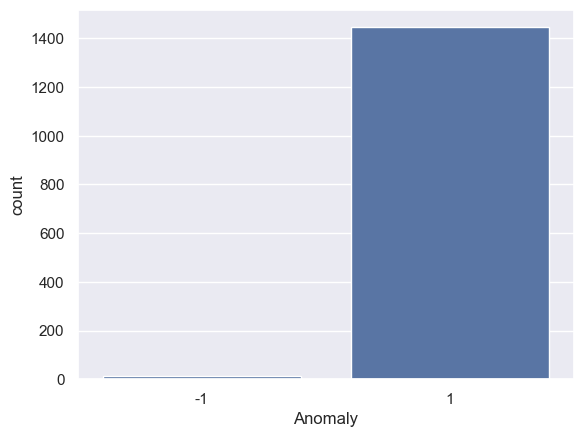

In [530]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled_anomaly = X.copy()
X_labeled_anomaly["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x=X_labeled_anomaly["Anomaly"])

And visualize the anomalies on the 2D scatterplot.

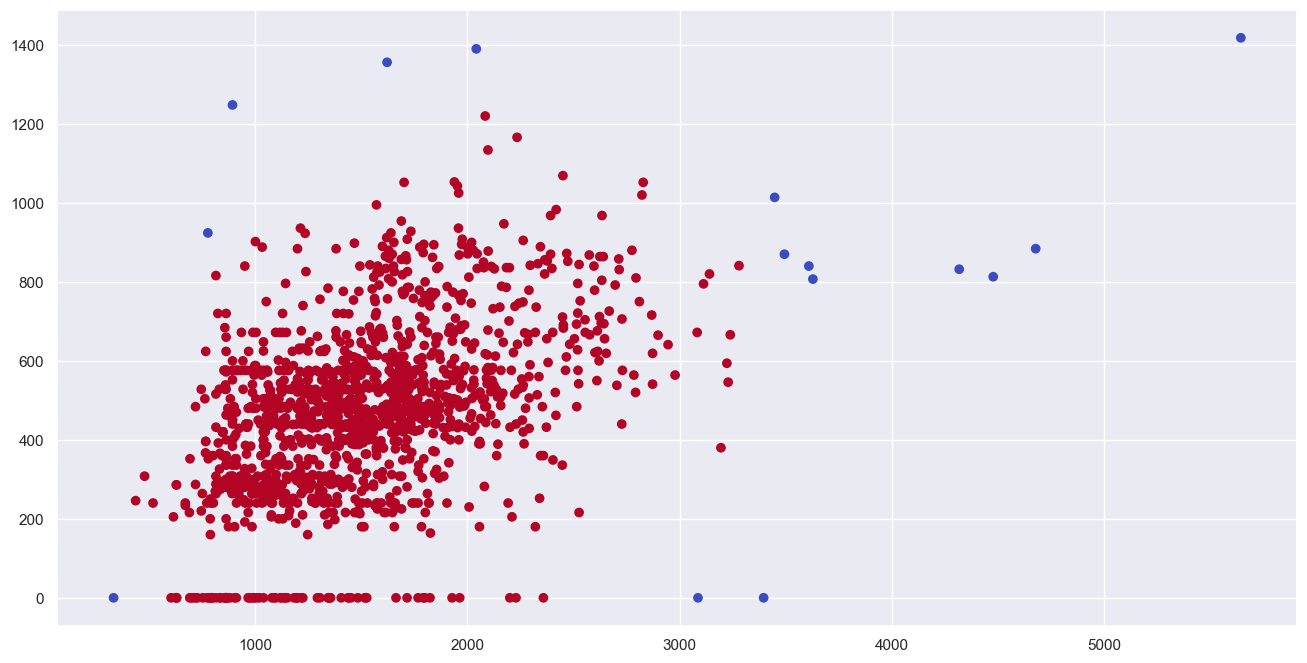

In [531]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Anomaly", cmap = 'coolwarm', data = X_labeled_anomaly)

<Axes: xlabel='GarageArea', ylabel='Anomaly'>

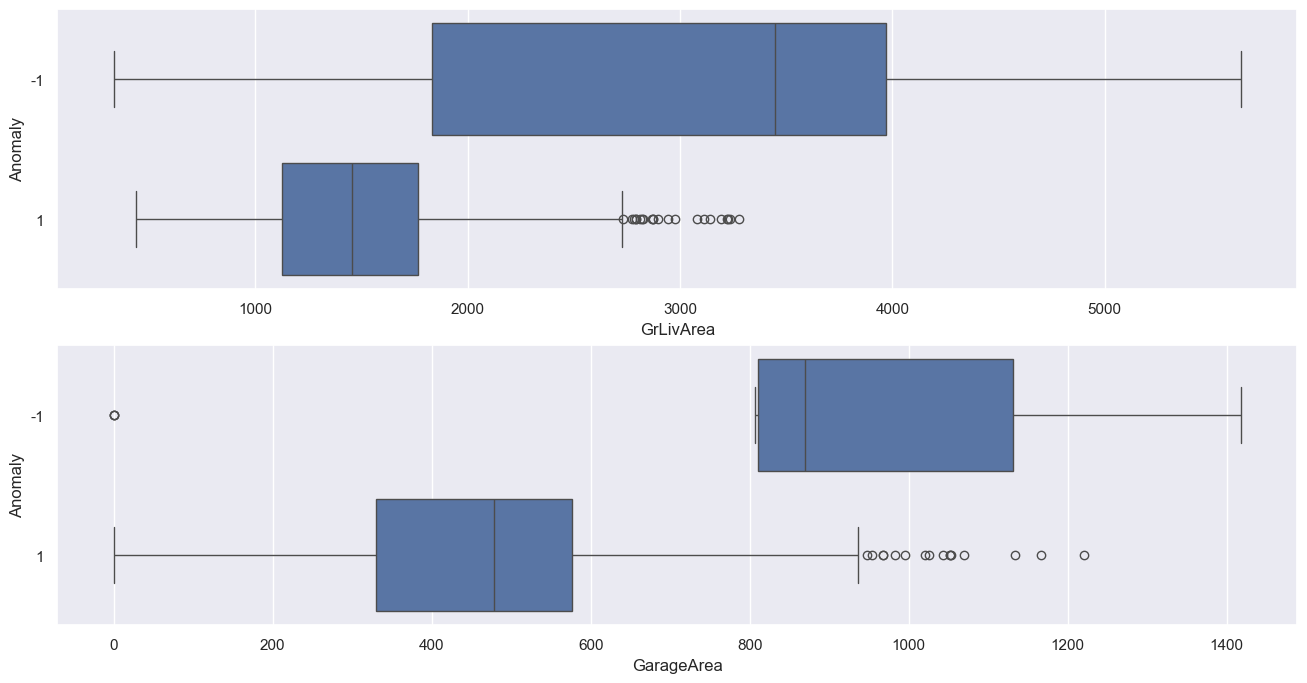

In [532]:
f, axes = plt.subplots(2, 1, figsize=(16, 8))
sb.boxplot(x = 'GrLivArea', y = 'Anomaly', data = X_labeled_anomaly, ax = axes[0])
sb.boxplot(x = 'GarageArea', y = 'Anomaly', data = X_labeled_anomaly, ax = axes[1])